# Features importance 
Features importance using standard covariance matrix techniques

Features of trajectories calculation
List of all features is available in source code. We estimate Q measure of trajectories for different window size, distanceof jumps distributions.

Comment: Q measure with different window size parameters gives redundant information about trajectory.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#read trajectories and calculate features matrix 

import numpy as np
import torch
import os
import sys
sys.path.append('../')

from src.features import Q_measure, dist_distribution, convex_hull
from src.andi_tools import Andi_to_xy
from src.training import FeedForward

%load_ext autoreload
%autoreload 2

# load trajectories from training dataset with labels  
trajectories, labels = Andi_to_xy("data/test_2d.csv","data/label_2d.csv")

# make labels in format we need 
labels = torch.FloatTensor(labels)
labels = torch.max(labels, 1)[1]

In [1]:
#download test data 


df=pd.read_csv("data/testfeatures.csv")


df.describe()

df.head()

In [27]:
df.columns


df.dtypes



customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# let us transform to numeric int values 

#df = pd.DataFrame(data=[str(i + 1980) for i in range(10)], columns=['Congress'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='ignore')
df.head()


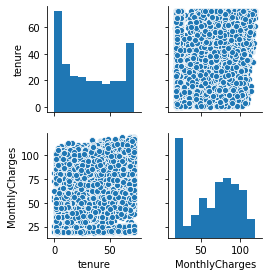

In [12]:
# let us choose some columns to start with where there are numbers

cols = ["feature1", "feature2"] #, "feature3"]

sns.pairplot(df[cols], size=2.0)


# Pdf of feature 
We may need to perform normalisation of the data features. 
It is therefore important that when a covariance matrix using these variables, variables be brought to same scale either by standardizing or normalizing the data. 

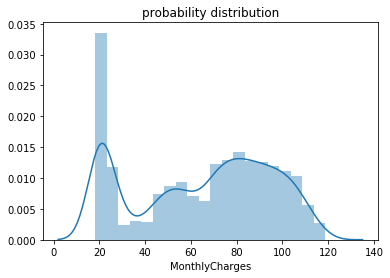

In [15]:

sns.distplot(df['feature 1'],bins=20)
plt.title('probability distribution')
plt.show()

# Calculation of the covariance matrix

In [ ]:
from sklearn.preprocessing import StandardScaler 

Nfeat = 7 # number of features

stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,Nfeat)].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()



#  Select important variables (columns)
From the covariance matrix plot above, if we assume important features have a correlation coefficient of 0.5 or greater. 